In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../binary')
import system

In [25]:
t = np.linspace(67.5, 69, 100000)

t0p = 0
ep = 0.2
Pp = 365
Op = 0.0 * np.pi / 180
wp = 0.0 * np.pi / 180
ip = 90.0 * np.pi / 180
mp = 10.0

t0m = -1.4
em = 0.3
Pm = 1
Om = 0.0 * np.pi / 180
wm = 90.0 * np.pi / 180
im = 90.0 * np.pi / 180
mm = 5.0

ms = ac.M_sun.value / ac.M_earth.value

In [26]:
# figure out the lan/lop confusion 
moon = system.rock('m', 0.05, mm, t0m, em, Pm, wm, Om, im)
planet = system.rock('p', 0.1, mp, t0p, ep, Pp, wp, Op, ip)
star = system.star(1.0, 0.5, 0.5)
sys = system.system(star, planet, moon)

%time sys.compute(t, grad=True)
grad = sys.grad()
lc = sys.lightcurve()

CPU times: user 426 ms, sys: 71 ms, total: 497 ms
Wall time: 517 ms


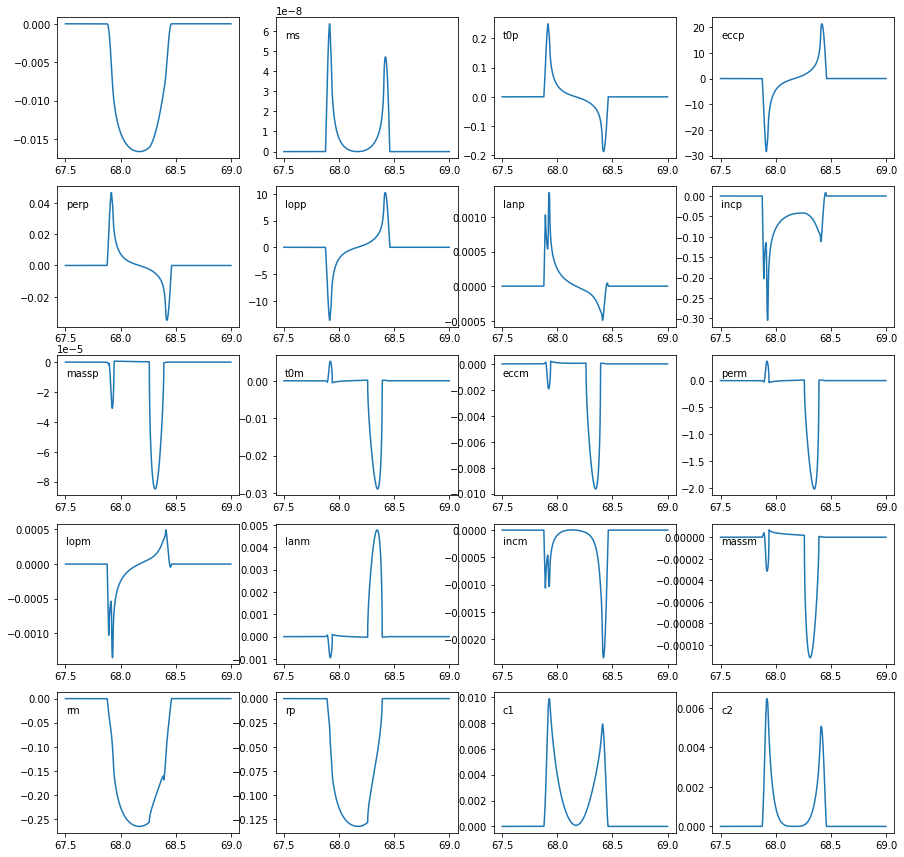

In [27]:
fig, axs = plt.subplots(5, 4, figsize=(15, 15))
axs = axs.flatten()

axs[0].plot(t, lc)
for i, (name, gradient) in enumerate(list(grad.items())):
    axs[i + 1].plot(t, gradient)
    axs[i + 1].annotate(name, xy=(0.05, 0.85), xycoords='axes fraction')

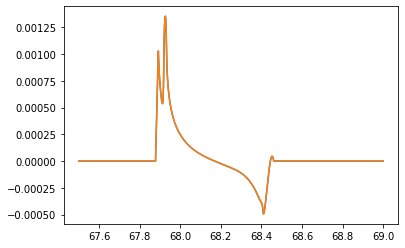

In [34]:
d = 0.000001

moon = system.rock('m', 0.05, mm, t0m, em, Pm, wm, Om, im)
planet = system.rock('p', 0.1, mp, t0p, ep, Pp, wp, Op, ip)
star = system.star(1.0, 0.5, 0.5)
sys = system.system(star, planet, moon)
sys.compute(t)
lc1 = sys._lc

sys.compute(t, grad=True)
lc = sys._lc

moon = system.rock('m', 0.05, mm, t0m, em, Pm, wm, Om, im)
planet = system.rock('p', 0.1, mp, t0p, ep, Pp, wp, Op + d, ip)
star = system.star(1.0, 0.5, 0.5)
sys = system.system(star, planet, moon)
sys.compute(t, grad=True)
grad = sys.grad()

plt.plot(t, (lc2 - lc1)/d)
plt.plot(t, grad['lanp'])

In [ ]:
from kep import grad_impacts, impacts
ms = ac.M_sun.value / ac.M_earth.value
%time bp, bpm, theta, dbp, dbpm, dtheta = grad_impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)
%time bp, bpm, theta = impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)

In [ ]:
d = 0.000001
ms = ac.M_sun.value / ac.M_earth.value
bp1, bpm1, theta1 = impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)
bp2, bpm2, theta2 = impacts(t, ms, t0p, ep, Pp, Op + d, wp, ip, mp, t0m, em, Pm, Om , wm, im, mm)
bp3, bpm3, theta3 = impacts(t, ms, t0p, ep, Pp, Op - d, wp, ip, mp, t0m, em, Pm, Om , wm, im, mm)
plt.plot(t, (bp2 - bp3)/(2 * d))
plt.plot(t, dbp[:, 4])
plt.figure()
plt.plot(t, dbp[:, 4] - (bp2 - bp3)/(2 * d))

In [ ]:
d = 0.0000000001
bp1, bpm1, theta1 = input_coords(t, 1, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)
bp2, bpm2, theta2 = input_coords(t, 1, t0p, ep, Pp, Op, wp, ip, mp + d, t0m, em, Pm, Om, wm, im, mm)
plt.plot(t, dbp[:, 7])
plt.plot(t, (bp2 - bp1)/d)
plt.figure()
plt.plot(t, dbp[:, 7] - (bp2 - bp1)/d)
#plt.plot(t, (bpm1-bpm2)/d)
#plt.plot(t, (theta1-theta2)/d)

In [ ]:
plt.plot(t, bp1)
plt.plot(t, bp2)

In [ ]:
plt.plot(t, bp2)
plt.plot(t, bp1)

In [ ]:
[plt.plot(t, dbp[:, i]) for i in range(15)];

In [ ]:
star = system.star(1, 0.5, 0.5)
planet = system.rock(0.1, 10, t0p, ep, Pp, Op, wp, ip)
moon = system.rock(0.05, 5, t0m, em, Pm, Om, wm, im)
sys = system.system(star, planet, moon)
%time sys.compute(t)

In [ ]:
plt.plot(t, sys.lightcurve())

In [ ]:
plt.plot(t, sys.derivatives());

In [ ]:
a = np.random.randn(15, 100000)
b = np.random.randn(15, 100000)
c = np.random.randn(15, 100000)
d = np.random.randn(15, 100000)
e = np.random.randn(15, 100000)
f = np.random.randn(15, 100000)
g = np.random.randn(15, 100000)
h = np.random.randn(15, 100000)
i = np.random.randn(15, 100000)
j = np.random.randn(15, 100000)

In [ ]:
j

In [ ]:
mp = 10
mm = 5

In [ ]:
(1, 2, 3) + (4, 5, 6)

In [ ]:
def testfunc(a, b, c, d, e, f):
    return a + b + c + d + e + f

In [ ]:
testfunc(*((1, 2, 3) + (4, 5, 6)))

In [ ]:
from phot import flux

In [ ]:
lc = flux(0.5, 0.5, 0.1, 0.05, bp, bpm, np.cos(theta), np.sin(theta))
plt.plot(t, lc[:, 0])

In [ ]:
dflux = lc[:, 3][:, None] * dbp + lc[:, 4][:, None] * dbpm + lc[:, 5][:, None] * dtheta

In [ ]:
dflux

In [ ]:
np.shape(np.hstack([np.ones(len(t))[:, None], dflux, np.ones(len(t))[:, None]]))

In [ ]:
np.shape(dflux)

In [ ]:
arr = np.vstack([np.array([1, 2, 3]), np.array([4, 5, 6])])
names = ['line1', 'line2']

In [ ]:
d = {}
{names[i]: arr[i] for i in range(len(names))}

In [ ]:
(1,) + (2, 3)

In [ ]:
str(1)